This python code  analyes the US Gun Violence Data downloded from https://www.kaggle.com/datasets/jameslko/gun-violence-data.
Based on the data, we have analyed the following-

1. top 5 states with maximum cases reported
2. Top five states with maximum people killed
3. What percentage of guns were stolen?
4. How does gun crime vary with age and gender?
5. Plot for number of suspects and different agr groups
6. Which different types of guns were used?


In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
gun_violence=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")

### Top 5 states with maximum cases reported

In [4]:
# top 5 states with maximum cases reported
(gun_violence.state.value_counts()).head(5)

Illinois      17556
California    16306
Florida       15029
Texas         13577
Ohio          10244
Name: state, dtype: int64

### Top five states with maximum people killed

In [5]:
#Top five states with maximum people killed

df=gun_violence.groupby(['state','city_or_county']).n_killed.sum().reset_index(name='killed')

In [6]:
df1=(df.groupby(['state']).killed.sum()).reset_index(name='deaths')
df1=(df1.sort_values(by='deaths',ascending=False))
df1=df1.reset_index(drop=True)

print("\n----------------------- Top five states with maximum people killed----------------------\n\n")
df1.head(5)


----------------------- Top five states with maximum people killed----------------------




,state,deaths
0,California,5562
1,Texas,5046
2,Florida,3909
3,Illinois,3409
4,Ohio,2508


## What percentage of guns were stolen? 

In [7]:
glist=gun_violence.gun_stolen.dropna()
glist=list(glist)

In [8]:
glist = list(map(lambda x: x.split('||')[0], glist))

In [16]:
stole_count=(glist.count('0::Stolen') + glist.count('1::Stolen'))

In [17]:
percent_stolen_gun=stole_count/sum(gun_violence.n_guns_involved.dropna())*100
print("percentage of gun's stolen: ",percent_stolen_gun,"%")

percentage of gun's stolen:  3.67416290815 %


### How does gun crime vary with age and gender?

In [313]:
df=pd.DataFrame(gun_violence[['participant_age','participant_gender','participant_type']])

def get_user_mapping(txt):
    if txt == "NaN":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NaN")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NaN")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NaN")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))

In [314]:
def concat_col(a,b,c):
    
    aa=dict()
    for key, value in a.items():
        aa[key] =([value])
        if key in b.keys() :       
            aa[key].append((b[key]))
        else:
            aa[key].append('NaN')
        
        if key in c.keys() :
            aa[key].append((c[key]))
        else:
            aa[key].append('NaN')    
    return (aa.values())


In [315]:
#list(map(concat_col, df['participant_type_map'], df['participant_gender_map']))
df['new']=df[['participant_type_map','participant_gender_map','participant_age_map']].apply(lambda x: concat_col(x.participant_type_map, x.participant_gender_map,x.participant_age_map), axis=1)

In [316]:

#df[['type', 'gender', 'age']] = df['new'].str.split(',', expand=True)
#l=list(([Victim, Male, 20], [Victim, Male, unknown], [Victim, unknown, unknown], [Victim, Male, unknown], [Subject-Suspect, Female, unknown]))

In [317]:
df1=(df['new'])
x=[]

for i in range(len(df1)):
    for values in df['new'][i]:

        x.append(values)



In [319]:
df3=pd.DataFrame(x)
df3.columns = ['type', 'gender','age']
df3.loc[df3['type'] == 'Subject-Suspect']

,type,gender,age
4,Subject-Suspect,Female,NaN
9,Subject-Suspect,NaN,NaN
10,Subject-Suspect,Male,25
11,Subject-Suspect,Male,31
18,Subject-Suspect,Male,33
22,Subject-Suspect,Female,47
27,Subject-Suspect,Male,NaN
28,Subject-Suspect,Male,NaN
34,Subject-Suspect,Male,15
40,Subject-Suspect,NaN,NaN


In [320]:
df4=df3.groupby(['type']).gender.value_counts().reset_index(name='gen_count')

In [321]:
#Subject_suspect
df4

,type,gender,gen_count
0,Subject-Suspect,Male,167708
1,Subject-Suspect,NaN,16459
2,Subject-Suspect,Female,11746
3,Victim,Male,136394
4,Victim,Female,30630
5,Victim,NaN,22575
6,Victim,"Male, female",1


In [322]:
df4.loc[df4['type'] == 'Subject-Suspect']

,type,gender,gen_count
0,Subject-Suspect,Male,167708
1,Subject-Suspect,NaN,16459
2,Subject-Suspect,Female,11746


In [323]:
tot_suspect=df4.gen_count[0]+df4.gen_count[1]+df4.gen_count[2]

male_perc=df4.gen_count[0]/tot_suspect*100

In [324]:
female_perc=df4.gen_count[2]/tot_suspect*100

In [325]:
print("total percentage of males in Suspect -", male_perc,"%")
print("total percentage of females in Suspect -", female_perc,"%")

total percentage of males in Suspect - 85.6033035072 %
total percentage of females in Suspect - 5.99551841889 %


### Plot for number of suspects and different agr groups

In [ ]:
df4=df3.loc[df3['type'] == 'Subject-Suspect']

In [327]:
l=list((df4.age))
#res = {i:l.count(i) for i in l}
l = [int(x) for x in l if x != 'NaN']


In [328]:
from collections import Counter

a = dict(Counter(l))

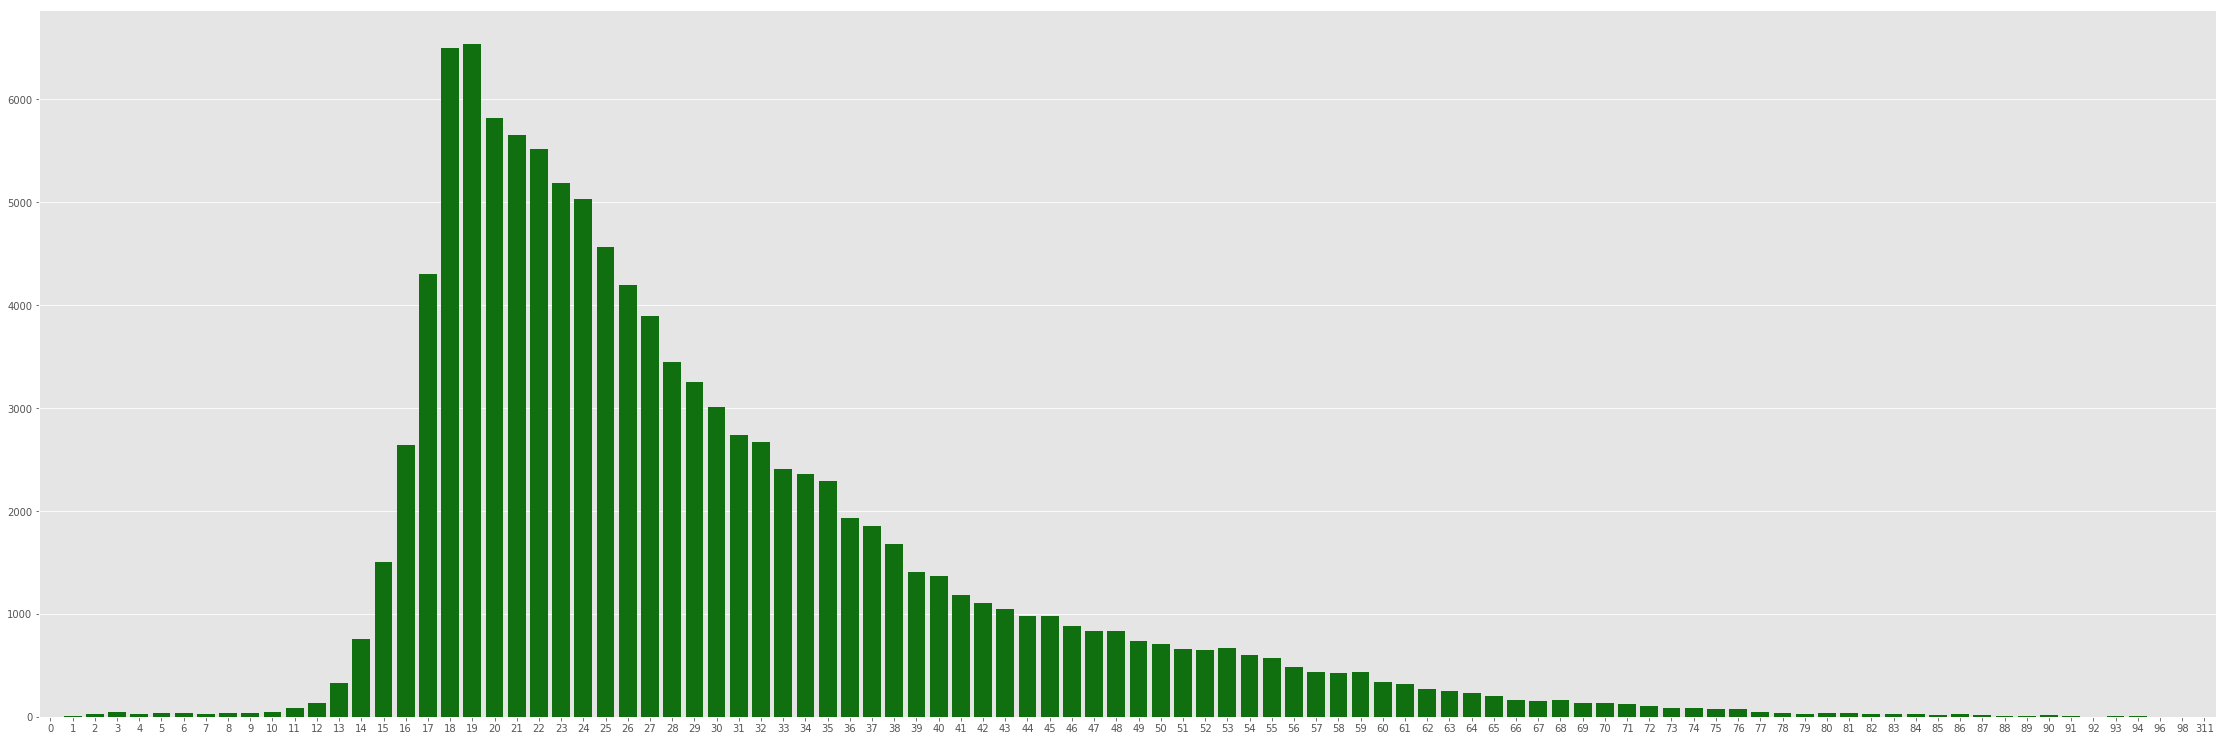

In [329]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

   
plt.figure(figsize=(39,13))
sns.barplot(list(a.keys()), list(a.values()), color='g')

plt.show()

### Which different types of guns were used?


In [434]:
df_gun=pd.DataFrame(gun_violence[['gun_type']])
#dfg['gun_type_map'] = dfg['gun_type'].apply(lambda x : get_user_mapping(x))

In [435]:
x=[]
df_gun['gun_list']=df_gun.gun_type.apply(lambda x: x.values())


for i in range(len(df_gun)):
    for values in df_gun['gun_list'][i]:

        x.append(values)



In [436]:
d=pd.DataFrame(x)
d.columns=['guns']


In [455]:
print("\n----------------list of guns used------------------\n" )
dd=d.guns.value_counts().reset_index(name='count').rename(columns={"index": "GunType", "count": "Count of incidents:"})
#dd.iloc[1:]
dd[dd.GunType!="Unknown"]


----------------list of guns used------------------



,GunType,Count of incidents:
1,Handgun,25038
2,9mm,6448
3,Rifle,5268
4,Shotgun,4263
5,22 LR,3346
6,40 SW,2745
7,380 Auto,2392
8,45 Auto,2360
9,38 Spl,1809
10,223 Rem [AR-15],1613
